In [1]:
import numpy as np
from pandas import read_csv
from sklearn import preprocessing, neighbors,svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn. ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
BG = BaggingClassifier(DecisionTreeClassifier(), max_samples= 0.5, max_features = 1.0, n_estimators = 20)
RF = RandomForestClassifier(class_weight ={0: 3., 1: 1.})
NN = MLPClassifier(solver='adam', hidden_layer_sizes=(512,))
SV = svm.SVC(kernel='sigmoid', probability=True)
ADA = AdaBoostClassifier()
KNN = KNeighborsClassifier()
DTC = tree.DecisionTreeClassifier()
MNB = MultinomialNB()
GBC = GradientBoostingClassifier()
LR = LogisticRegression(class_weight ={0: 3., 1: 1.})

In [3]:
train_set=read_csv('data/train_set.csv')
val_set=read_csv('data/val_set.csv')
test_set=read_csv('data/test_set.csv')

In [4]:
trainy=read_csv('data/trainy.csv')
valy=read_csv('data/valy.csv')
testy=read_csv('data/testy.csv')

In [5]:
df = read_csv('data/orginal_data.csv')

In [6]:
# make the range between 0 and 1
column = list(train_set.columns.values)
for col in column:
    minimum = df[col].min()
    maximum = df[col].max()
    train_set[col] = (train_set[col] - minimum)/(maximum-minimum)
    val_set[col] = (val_set[col] - minimum)/(maximum-minimum)
    test_set[col] = (test_set[col] - minimum)/(maximum-minimum)

In [7]:
BG.fit(train_set, trainy)
RF.fit(train_set, trainy)
NN.fit(train_set, trainy)
SV.fit(train_set, trainy)
ADA.fit(train_set, trainy)
KNN.fit(train_set, trainy)
DTC.fit(train_set, trainy)
MNB.fit(train_set, trainy)
GBC.fit(train_set, trainy)
LR.fit(train_set, trainy)

/Users/yanjia/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/yanjia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/Users/yanjia/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/yanjia/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS RE

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
y_pred_bg = BG.predict(test_set)
y_pred_rf = RF.predict(test_set)
y_pred_nn = NN.predict(test_set)
y_pred_sv = SV.predict(test_set)
y_pred_ada = ADA.predict(test_set)
y_pred_knn = KNN.predict(test_set)
y_pred_dtc = DTC.predict(test_set)
y_pred_mnb = MNB.predict(test_set)
y_pred_gbc = GBC.predict(test_set)
y_pred_lr = LR.predict(test_set)

In [9]:
from tensorflow.keras.models import model_from_json
import tensorflow.keras.backend 

keras_model_weights = "final_model/keras2_conv1d.h5"
keras_model_json = "final_model/keras2_conv1d.json"

keras_model = model_from_json(open(keras_model_json).read())
keras_model = tensorflow.keras.models.load_model(keras_model_weights)
keras_model.summary()

/Users/yanjia/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/yanjia/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/yanjia/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/yanjia/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


/Users/yanjia/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/yanjia/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/yanjia/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/yanjia/anaconda3/lib/python3.7/site-packages/tensor

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 25, 64)            128       
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 25, 128)           8320      
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 25, 256)           33024     
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 25, 256)           65792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 25, 256)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6400)              0         
__________________________

In [45]:
test_set_cnn = test_set.values
test_set_cnn = np.reshape(test_set_cnn, (test_set_cnn.shape[0],test_set_cnn.shape[1],1))

In [133]:
train_set_cnn = train_set.values
train_set_cnn = np.reshape(train_set_cnn, (train_set_cnn.shape[0],train_set_cnn.shape[1],1))

In [46]:
val_set_cnn = val_set.values
val_set_cnn = np.reshape(val_set_cnn, (val_set_cnn.shape[0],val_set_cnn.shape[1],1))

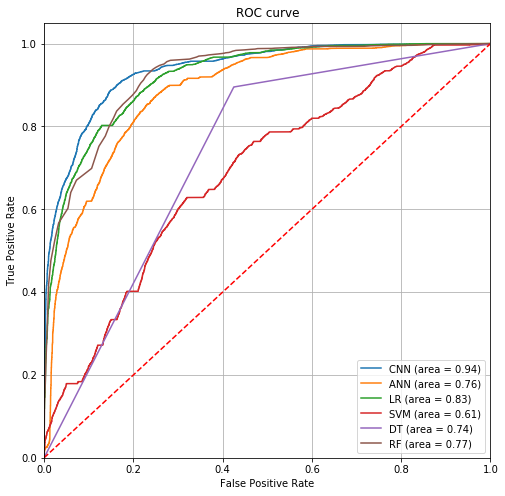

In [132]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

y_pred_test = keras_model.predict(test_set_cnn)
y_pred_test = y_pred_test.ravel()
y_true_test = testy.values.ravel()
fpr_test, tpr_test, thresholds_test = roc_curve(y_true_test, y_pred_test)
auc_test = auc(fpr_test, tpr_test)

lr_roc_auc = roc_auc_score(testy, LR.predict(test_set))
gbc_roc_auc = roc_auc_score(testy, GBC.predict(test_set))
#mnb_roc_auc = roc_auc_score(testy, MNB.predict(test_set))
dtc_roc_auc = roc_auc_score(testy, DTC.predict(test_set))
#knn_roc_auc = roc_auc_score(testy, KNN.predict(test_set))
#ada_roc_auc = roc_auc_score(testy, ADA.predict(test_set))
sv_roc_auc = roc_auc_score(testy, SV.predict(test_set))
nn_roc_auc = roc_auc_score(testy, NN.predict(test_set))
rf_roc_auc = roc_auc_score(testy, RF.predict(test_set))
#bg_roc_auc = roc_auc_score(testy, BG.predict(test_set))

fpr_lr, tpr_lr, thresholds = roc_curve(testy, LR.predict_proba(test_set)[:,1])
fpr_gbc, tpr_gbc, thresholds = roc_curve(testy, GBC.predict_proba(test_set)[:,1])
#fpr_mnb, tpr_mnb, thresholds = roc_curve(testy, MNB.predict_proba(test_set)[:,1])
fpr_dtc, tpr_dtc, thresholds = roc_curve(testy, DTC.predict_proba(test_set)[:,1])
#fpr_knn, tpr_knn, thresholds = roc_curve(testy, KNN.predict_proba(test_set)[:,1])
#fpr_ada, tpr_ada, thresholds = roc_curve(testy, ADA.predict_proba(test_set)[:,1])
fpr_sv, tpr_sv, thresholds = roc_curve(testy, SV.predict_proba(test_set)[:,1] )
fpr_nn, tpr_nn, thresholds = roc_curve(testy, NN.predict_proba(test_set)[:,1])
fpr_rf, tpr_rf, thresholds = roc_curve(testy, RF.predict_proba(test_set)[:,1])
#fpr_bg, tpr_bg, thresholds = roc_curve(testy, BG.predict_proba(test_set)[:,1])


plt.figure(figsize=(8, 8))
plt.plot(fpr_test, tpr_test, label= 'CNN (area = {:.2f})'.format(auc_test))
plt.plot(fpr_nn, tpr_nn, label='ANN (area = %0.2f)' % nn_roc_auc)
plt.plot(fpr_lr, tpr_lr, label='LR (area = %0.2f)' % lr_roc_auc)
plt.plot(fpr_sv, tpr_sv, label='SVM (area = %0.2f)' % sv_roc_auc)
plt.plot(fpr_dtc, tpr_dtc, label='DT (area = %0.2f)' % dtc_roc_auc)
#plt.plot(fpr_gbc, tpr_gbc, label='GBM (area = %0.2f)' % gbc_roc_auc)
plt.plot(fpr_rf, tpr_rf, label='RF (area = %0.2f)' % rf_roc_auc)

#plt.plot(fpr_mnb, tpr_mnb, label='MNB (area = %0.2f)' % mnb_roc_auc)
#plt.plot(fpr_knn, tpr_knn, label='KNN (area = %0.2f)' % knn_roc_auc)
#plt.plot(fpr_ada, tpr_ada, label='ADA (area = %0.2f)' % ada_roc_auc)
#plt.plot(fpr_bg, tpr_bg, label='BG (area = %0.2f)' % bg_roc_auc)


plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.grid()
plt.legend(loc='best')
plt.savefig('Log_ROC')
plt.show()

In [112]:
from sklearn.metrics import classification_report
y_pred_val = keras_model.predict(val_set_cnn)
y_pred_test = keras_model.predict(test_set_cnn)

target_names = ['class 0', 'class 1']
y_pred_test[y_pred_test>0.5] = 1
y_pred_test[y_pred_test<=0.5] = 0
y_pred_val[y_pred_val>0.5] = 1
y_pred_val[y_pred_val<=0.5] = 0

In [137]:
_, accuracy_test = keras_model.evaluate(test_set_cnn, testy, batch_size=128, verbose=1)

19584/19584 [==============================] - 1s 34us/sample - loss: 0.3456 - acc: 0.8648


In [138]:
_, accuracy_test = keras_model.evaluate(train_set_cnn, trainy, batch_size=128, verbose=1)

175976/175976 [==============================] - 5s 31us/sample - loss: 0.3227 - acc: 0.8799


In [139]:
_, accuracy_test = keras_model.evaluate(val_set_cnn, valy, batch_size=128, verbose=1)

24531/24531 [==============================] - 1s 32us/sample - loss: 0.3498 - acc: 0.8605


In [81]:
print(classification_report(testy.values, y_pred_test, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.69      0.86      0.77      5051
     class 1       0.95      0.87      0.90     14533

    accuracy                           0.86     19584
   macro avg       0.82      0.86      0.84     19584
weighted avg       0.88      0.86      0.87     19584



In [113]:
precision_recall_fscore_support(testy.values, y_pred_test, average='macro')

(0.8190869789650277, 0.863785895256262, 0.835823524697883, None)

In [114]:
print(classification_report(testy.values, y_pred_nn, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.81      0.56      0.67      5051
     class 1       0.86      0.96      0.91     14533

    accuracy                           0.85     19584
   macro avg       0.84      0.76      0.79     19584
weighted avg       0.85      0.85      0.84     19584



In [111]:
precision_recall_fscore_support(testy.values, y_pred_nn, average='macro')

(0.838762956571018, 0.7592687253606416, 0.7863487077416786, None)

In [117]:
print(classification_report(testy.values, y_pred_sv, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.42      0.42      0.42      5051
     class 1       0.80      0.80      0.80     14533

    accuracy                           0.70     19584
   macro avg       0.61      0.61      0.61     19584
weighted avg       0.70      0.70      0.70     19584



In [119]:
print(classification_report(testy.values, y_pred_rf, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.93      0.55      0.69      5051
     class 1       0.86      0.99      0.92     14533

    accuracy                           0.87     19584
   macro avg       0.90      0.77      0.80     19584
weighted avg       0.88      0.87      0.86     19584



In [107]:
precision_recall_fscore_support(testy.values, y_pred_rf, average='macro')

(0.8956323586837182, 0.7654287514173023, 0.8034290604525474, None)

In [118]:
print(classification_report(testy.values, y_pred_dtc, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.66      0.57      0.61      5051
     class 1       0.86      0.90      0.88     14533

    accuracy                           0.81     19584
   macro avg       0.76      0.74      0.74     19584
weighted avg       0.81      0.81      0.81     19584



In [140]:
print(classification_report(test_set.values, y_pred_lr, target_names=target_names))

In [128]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(testy.values, y_pred_lr, average='macro')

(0.778639660235065, 0.8382995135437025, 0.7943828012004814, None)

In [130]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(LR.score(test_set, testy)))

Accuracy of logistic regression classifier on test set: 0.82
